In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

import xgboost as xgb
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
gridsearch = False

In [4]:
# def mape_score(y_true, y_pred):
#     y_true, y_pred = np.array(y_true), np.array(y_pred)
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [5]:
root = os.path.dirname(os.getcwd())

path = os.path.join(root, "data")

os.path.isdir(path)

#this will be an argparse, must be csv
filename = 'cleaned_data_train.csv'

df = pd.read_csv(os.path.join(path, filename))
df

,protocolSection_identificationModule_nctId,primary_study_duration_days,study_duration_days,primary_eq_bins,study_eq_bins,study_eq_labels,primary_eq_labels,number_of_conditions,number_of_groups,age_group,...,dor_outcome_measure,ae_outcome_measure,primary_max_days,secondary_max_days,max_treatment_duration,min_treatment_duration,survival_5yr_relative,conditions_category_num,phase_PHASE2_ PHASE3,phase_PHASE3
0,NCT01646437,2951.0,3377.0,"(1700.2, 4538.0]","(2211.0, 4722.0]",4,4,3,3,1,...,0,0,9125.0,9125.0,4320,14,0.680,11,False,True
1,NCT03299244,694.0,694.0,"(554.0, 859.8]","(677.0, 1131.0]",1,1,2,2,1,...,0,0,NaN,NaN,1080,360,0.175,2,False,True
2,NCT03306394,1504.0,1504.0,"(1183.8, 1700.2]","(1131.0, 1604.2]",2,3,1,1,1,...,0,1,84.0,84.0,1080,360,0.175,2,False,True
3,NCT02776683,847.0,847.0,"(554.0, 859.8]","(677.0, 1131.0]",1,1,1,1,1,...,1,1,574.0,574.0,1080,360,0.175,2,False,True
4,NCT06107790,1353.0,1353.0,"(1183.8, 1700.2]","(1131.0, 1604.2]",2,3,1,2,1,...,0,1,NaN,21.0,1825,365,0.990,5,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,NCT03070899,1090.0,1453.0,"(859.8, 1183.8]","(1131.0, 1604.2]",2,2,2,5,1,...,0,0,NaN,NaN,4320,14,0.680,11,False,True
1133,NCT04213677,925.0,956.0,"(859.8, 1183.8]","(677.0, 1131.0]",1,2,1,2,1,...,0,0,84.0,84.0,4320,14,0.680,11,False,True
1134,NCT03103087,756.0,1190.0,"(554.0, 859.8]","(1131.0, 1604.2]",2,1,2,3,1,...,0,1,35.0,168.0,4320,14,0.680,11,False,True
1135,NCT02321397,486.0,670.0,"(19.999, 554.0]","(90.999, 677.0]",0,0,2,2,1,...,0,1,1.0,245.0,4320,14,0.680,10,True,False


In [9]:
root

'/Users/cynthiaxu/Documents/MIDS/05_2024 Summer/210 Capstone/210-capstone-clinicaltrials'

In [6]:
temp_df = df.select_dtypes(exclude='object')
temp_df.columns

Index(['primary_study_duration_days', 'study_duration_days', 'study_eq_labels',
       'primary_eq_labels', 'number_of_conditions', 'number_of_groups',
       'age_group', 'num_locations', 'location', 'num_inclusion',
       'num_exclusion', 'number_of_intervention_types', 'sponsor_type',
       'intervention_model', 'resp_party', 'has_dmc', 'allocation', 'masking',
       'enroll_count', 'healthy_vol', 'treatment_purpose',
       'diagnostic_purpose', 'prevention_purpose', 'supportive_purpose',
       'procedure_intervention', 'device_intervention',
       'behavioral_intervention', 'drug_intervention',
       'radiation_intervention', 'biological_intervention',
       'os_outcome_measure', 'dor_outcome_measure', 'ae_outcome_measure',
       'primary_max_days', 'secondary_max_days', 'max_treatment_duration',
       'min_treatment_duration', 'survival_5yr_relative',
       'conditions_category_num', 'phase_PHASE2_ PHASE3', 'phase_PHASE3'],
      dtype='object')

# Heat Map

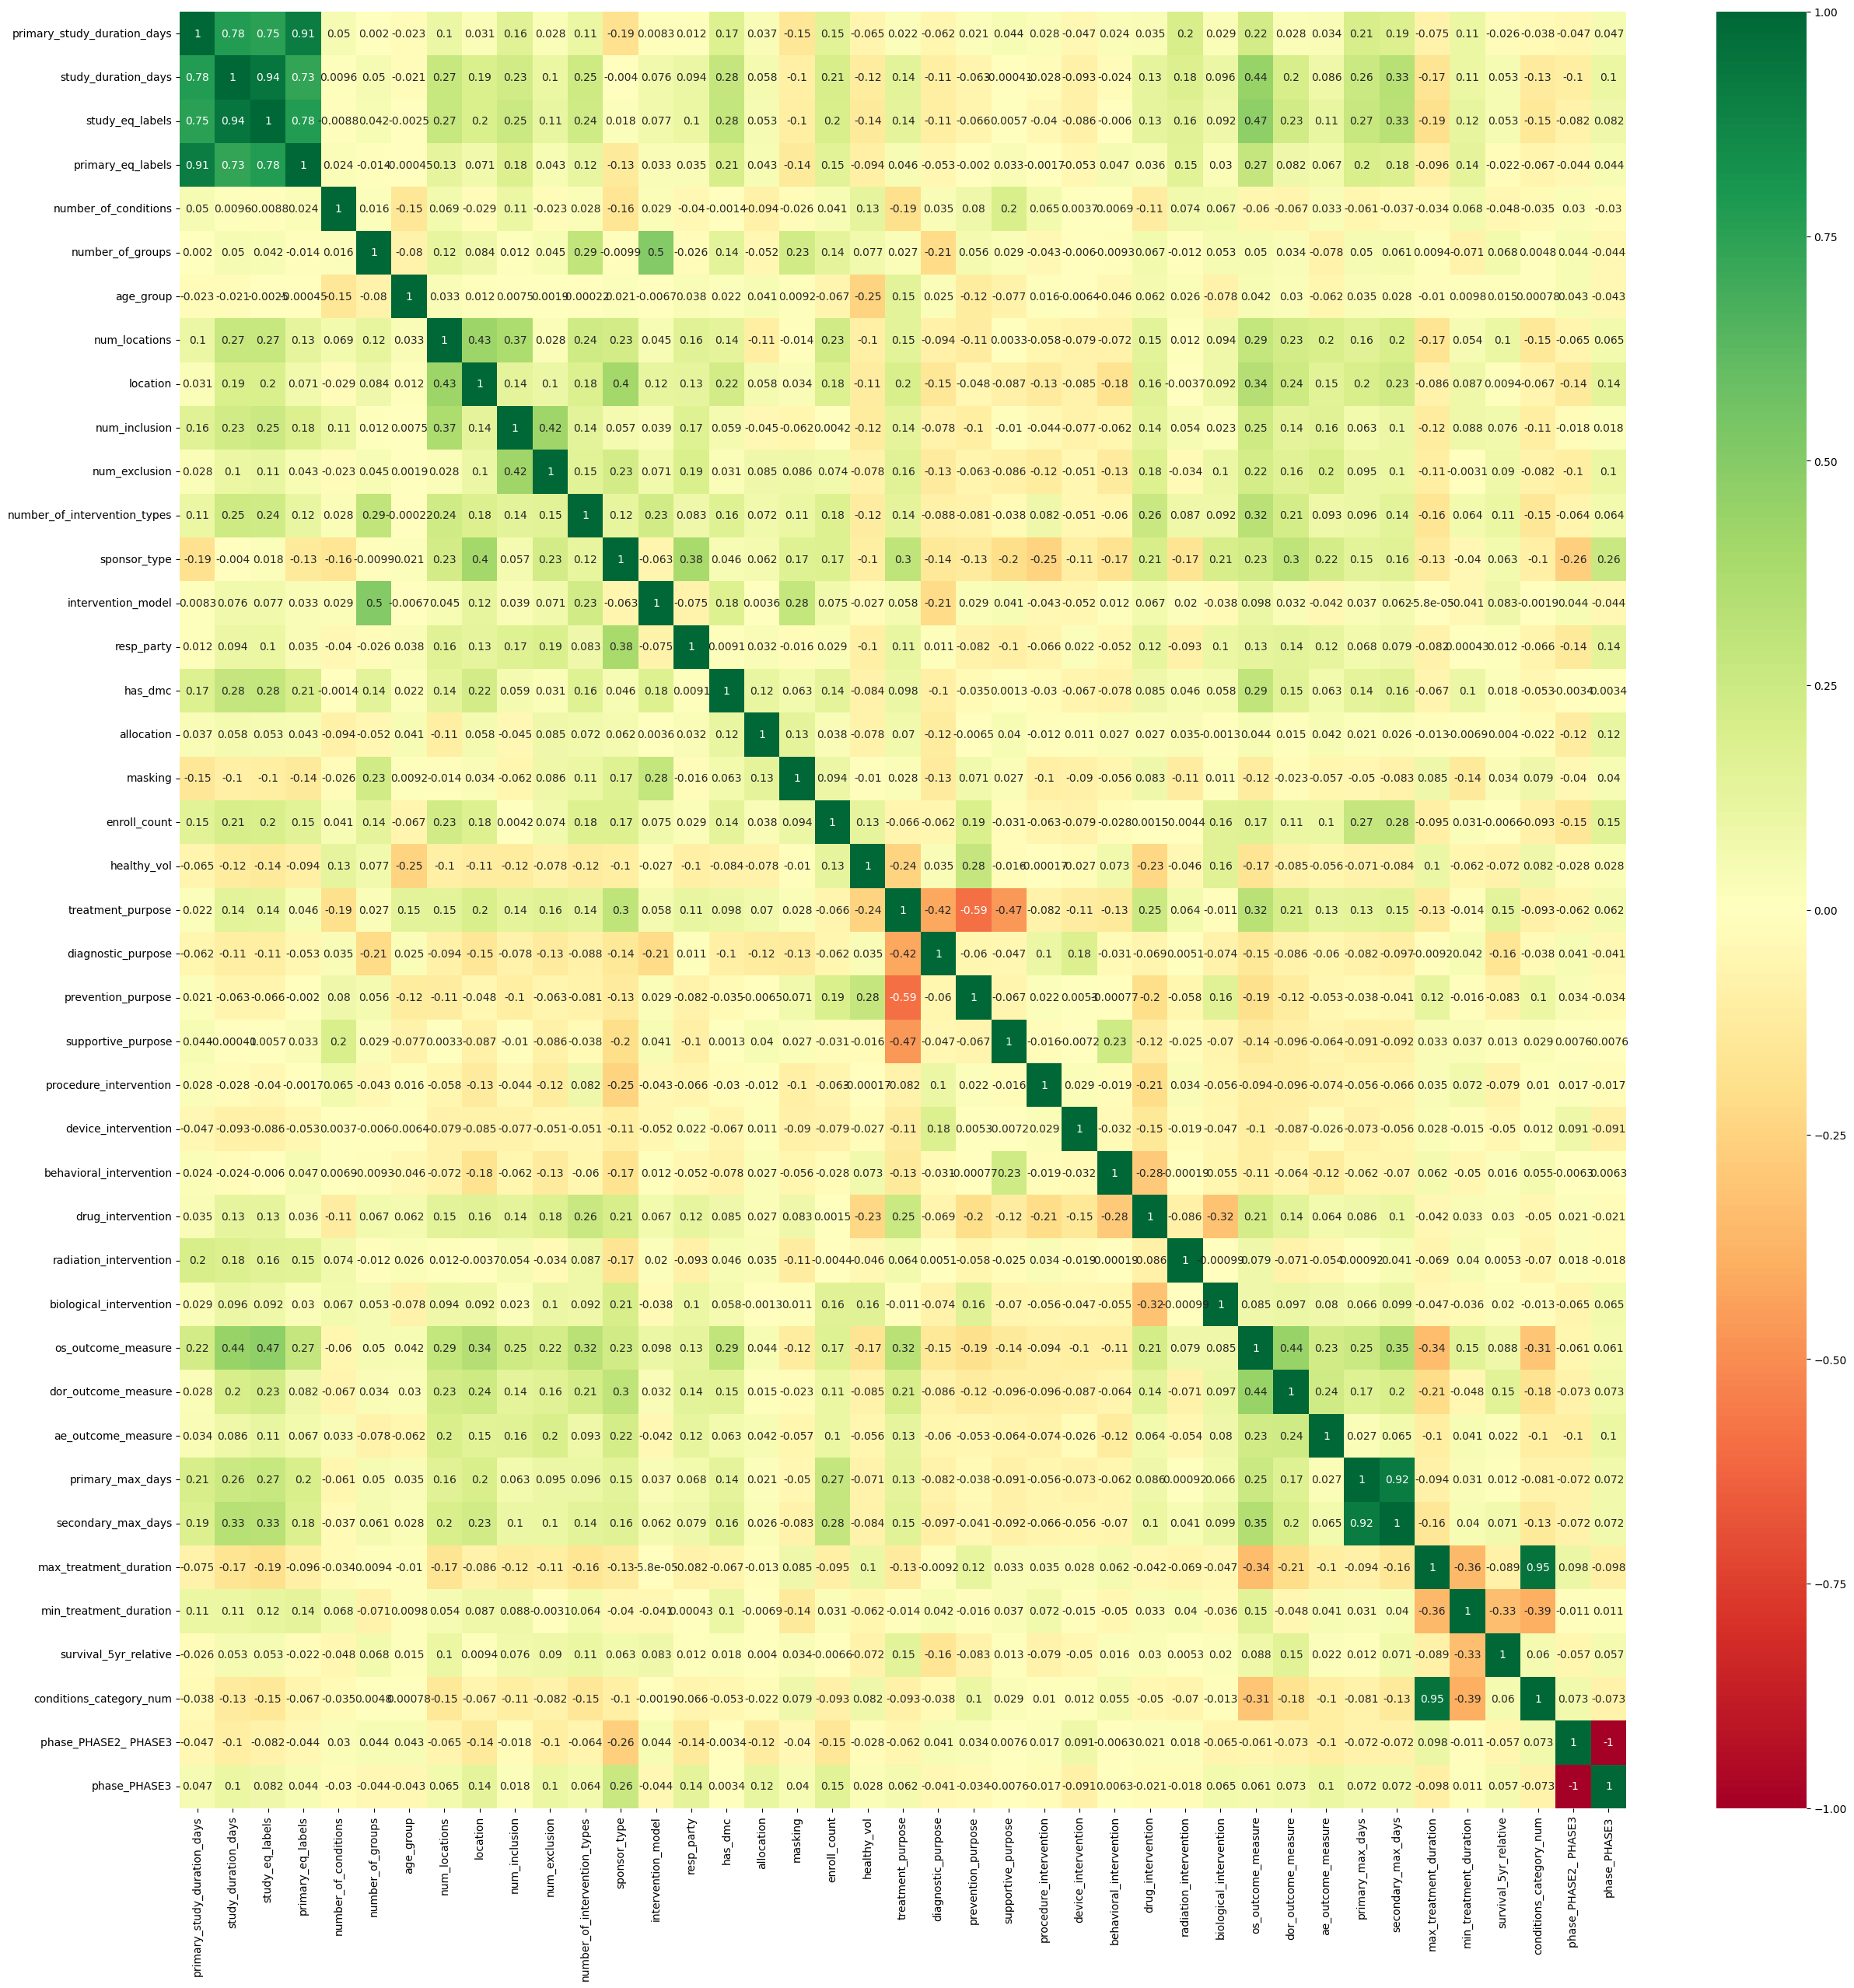

In [13]:
corrmat = temp_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.savefig(os.path.join(root, 'figures', 'correlation_matrix.png'))


In [11]:
plt.savefig(os.path.join(root, 'figures', 'correlation_matrix.png'))

AttributeError: 'Axes' object has no attribute 'savefig'

In [7]:
corrmat.loc['study_eq_labels'].sort_values(ascending=False)

study_eq_labels                 1.000000
study_duration_days             0.942075
primary_eq_labels               0.778609
primary_study_duration_days     0.754483
os_outcome_measure              0.471306
secondary_max_days              0.327170
has_dmc                         0.284569
num_locations                   0.269739
primary_max_days                0.266853
num_inclusion                   0.250269
number_of_intervention_types    0.239556
dor_outcome_measure             0.229128
enroll_count                    0.201899
location                        0.195183
radiation_intervention          0.160764
treatment_purpose               0.138673
drug_intervention               0.127094
min_treatment_duration          0.120709
ae_outcome_measure              0.113638
num_exclusion                   0.113575
resp_party                      0.103961
biological_intervention         0.092223
phase_PHASE3                    0.082038
intervention_model              0.077104
survival_5yr_rel

In [33]:
exclude_columns = ['study_eq_labels', 'study_duration_days', 'primary_eq_labels', 'primary_study_duration_days']
filtered = corrmat.loc['study_duration_days'][(abs(corrmat.loc['study_duration_days']) > 0.05) & (~corrmat.columns.isin(exclude_columns))]
corr_cols = filtered.index.to_list()
corr_cols

['num_locations',
 'location',
 'num_inclusion',
 'num_exclusion',
 'number_of_intervention_types',
 'intervention_model',
 'resp_party',
 'has_dmc',
 'allocation',
 'masking',
 'enroll_count',
 'healthy_vol',
 'treatment_purpose',
 'diagnostic_purpose',
 'prevention_purpose',
 'device_intervention',
 'drug_intervention',
 'radiation_intervention',
 'biological_intervention',
 'os_outcome_measure',
 'dor_outcome_measure',
 'ae_outcome_measure',
 'primary_max_days',
 'secondary_max_days',
 'max_treatment_duration',
 'min_treatment_duration',
 'survival_5yr_relative',
 'conditions_category_num',
 'phase_PHASE2_ PHASE3',
 'phase_PHASE3']

In [9]:
# # define X and y aka what features to use
# x_cols = [
#        'number_of_conditions', 'number_of_groups', 'age_group',
#        'num_locations', 'location', 'num_inclusion', 'num_exclusion',
#        'number_of_intervention_types', 'sponsor_type', 'intervention_model',
#        'resp_party', 'has_dmc', 'allocation', 'masking', 'enroll_count',
#        'healthy_vol', 'treatment_purpose', 'diagnostic_purpose',
#        'prevention_purpose', 'supportive_purpose', 'procedure_intervention',
#        'device_intervention', 'behavioral_intervention', 'drug_intervention',
#        'radiation_intervention', 'biological_intervention',
#        'os_outcome_measure', 'dor_outcome_measure', 'ae_outcome_measure',
#        'primary_max_days', 'secondary_max_days', 'phase_PHASE2_ PHASE3',
#        'phase_PHASE3']

# y_cols = ['study_eq_labels']

# X = df[x_cols]
# y = df[y_cols]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
x_cols = corr_cols

y_cols = ['study_eq_labels']

X = df[x_cols]
y = df[y_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# LightGBM

In [11]:
# Create the LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [12]:
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

/Users/cynthiaxu/Documents/MIDS/05_2024 Summer/210 Capstone/210-capstone-clinicaltrials/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cynthiaxu/Documents/MIDS/05_2024 Summer/210 Capstone/210-capstone-clinicaltrials/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 698
[LightGBM] [Info] Number of data points in the train set: 909, number of used features: 30
[LightGBM] [Info] Start training from score -1.586598
[LightGBM] [Info] Start training from score -1.682446
[LightGBM] [Info] Start training from score -1.586598
[LightGBM] [Info] Start training from score -1.575903
[LightGBM] [Info] Start training from score -1.619388
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [13]:
# params = {
#     'objective': 'regression',
#     'metric': 'rmse',
#     'boosting_type': 'gbdt',
#     'learning_rate': 0.1,
#     'num_leaves': 31,
#     'max_depth': -1,
#     'min_data_in_leaf': 20,
#     'verbose': -1
# }

# model = lgb.train(params, train_data, num_boost_round=100, valid_sets=[test_data], 
#                   callbacks=[lgb.early_stopping(stopping_rounds=10)])


In [14]:
# y_pred = model.predict(X_test, num_iteration=model.best_iteration)

# Predict probabilities for each class
y_pred_prob = model.predict_proba(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1) + 1  

# predicted_class = np.argmax(y_pred)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average='weighted')
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# mape = mape_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Accuracy: {acc}')
print(f'Precision: {pre}')
print(f'Mean Absolute Error: {mae}')
print(f"R-squared: {r2}")
# print(f"MAPE: {mape}")

Mean Squared Error: 2.6666666666666665
Accuracy: 0.19298245614035087
Precision: 0.20465407038938813
Mean Absolute Error: 1.3157894736842106
R-squared: -0.25036304761561134


/Users/cynthiaxu/Documents/MIDS/05_2024 Summer/210 Capstone/210-capstone-clinicaltrials/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
# model = lgb.LGBMRegressor()

# # Define the parameter grid
# param_grid = {
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [50, 100, 200],
#     'num_leaves': [31, 50, 100],
#     'max_depth': [-1, 10, 20],
#     'min_data_in_leaf': [20, 50, 100]
# }

# # Set up the grid search
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# # Fit the grid search
# grid_search.fit(X_train, y_train)

# # Print the best parameters and best score
# print(f'Best parameters found: {grid_search.best_params_}')
# print(f'Best score (MSE): {-grid_search.best_score_}')

# # Make predictions with the best model
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

In [16]:
if gridsearch==True:
    # Define the parameter grid
    param_grid = {
        'num_leaves': [20, 30, 40],
        'learning_rate': [0.05, 0.1],
        'n_estimators': [50, 100, 200]
    }

    # Initialize the LightGBM classifier
    lgb_model = lgb.LGBMClassifier()

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=3, scoring='accuracy')

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    # Print the best parameters and best score
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)

    # Predict using the best model
    y_pred_lgb = grid_search.best_estimator_.predict(X_test)

    # Evaluate the model
    print("Classification Report:")
    print(classification_report(y_test, y_pred_lgb))

In [17]:
params = {
    'learning_rate': 0.05, 'n_estimators': 50, 'num_leaves': 20
}

final_lgb_model = lgb.LGBMClassifier(learning_rate=params['learning_rate'],
                                     n_estimators=params['n_estimators'],
                                     num_leaves=params['num_leaves'])
final_lgb_model.fit(X_train, y_train)

# Predict probabilities for each class
y_pred_prob = final_lgb_model.predict_proba(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1) + 1  

# predicted_class = np.argmax(y_pred)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average='weighted')
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# mape = mape_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Accuracy: {acc}')
print(f'Precision: {pre}')
print(f'Mean Absolute Error: {mae}')
print(f"R-squared: {r2}")

/Users/cynthiaxu/Documents/MIDS/05_2024 Summer/210 Capstone/210-capstone-clinicaltrials/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cynthiaxu/Documents/MIDS/05_2024 Summer/210 Capstone/210-capstone-clinicaltrials/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 698
[LightGBM] [Info] Number of data points in the train set: 909, number of used features: 30
[LightGBM] [Info] Start training from score -1.586598
[LightGBM] [Info] Start training from score -1.682446
[LightGBM] [Info] Start training from score -1.586598
[LightGBM] [Info] Start training from score -1.575903
[LightGBM] [Info] Start training from score -1.619388


Mean Squared Error: 2.8728070175438596
Accuracy: 0.15789473684210525
Precision: 0.16184683413196266
Mean Absolute Error: 1.381578947368421
R-squared: -0.3470194016253707


/Users/cynthiaxu/Documents/MIDS/05_2024 Summer/210 Capstone/210-capstone-clinicaltrials/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [32]:
# Initialize Stratified K-Fold cross-validator
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_results = cross_val_score(final_lgb_model, X, y, cv=kfold, scoring='accuracy')

print("Cross-validation scores:", cv_results)
print("Mean accuracy:", cv_results.mean())

/Users/cynthiaxu/Documents/MIDS/05_2024 Summer/210 Capstone/210-capstone-clinicaltrials/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cynthiaxu/Documents/MIDS/05_2024 Summer/210 Capstone/210-capstone-clinicaltrials/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 693
[LightGBM] [Info] Number of data points in the train set: 909, number of used features: 30
[LightGBM] [Info] Start training from score -1.591989
[LightGBM] [Info] Start training from score -1.664851
[LightGBM] [Info] Start training from score -1.608338
[LightGBM] [Info] Start training from score -1.608338
[LightGBM] [Info] Start training from score -1.575903


/Users/cynthiaxu/Documents/MIDS/05_2024 Summer/210 Capstone/210-capstone-clinicaltrials/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cynthiaxu/Documents/MIDS/05_2024 Summer/210 Capstone/210-capstone-clinicaltrials/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 697
[LightGBM] [Info] Number of data points in the train set: 909, number of used features: 30
[LightGBM] [Info] Start training from score -1.591989
[LightGBM] [Info] Start training from score -1.659053
[LightGBM] [Info] Start training from score -1.613848
[LightGBM] [Info] Start training from score -1.608338
[LightGBM] [Info] Start training from score -1.575903


/Users/cynthiaxu/Documents/MIDS/05_2024 Summer/210 Capstone/210-capstone-clinicaltrials/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cynthiaxu/Documents/MIDS/05_2024 Summer/210 Capstone/210-capstone-clinicaltrials/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 910, number of used features: 30
[LightGBM] [Info] Start training from score -1.593089
[LightGBM] [Info] Start training from score -1.660153
[LightGBM] [Info] Start training from score -1.614948
[LightGBM] [Info] Start training from score -1.603958
[LightGBM] [Info] Start training from score -1.577003


/Users/cynthiaxu/Documents/MIDS/05_2024 Summer/210 Capstone/210-capstone-clinicaltrials/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cynthiaxu/Documents/MIDS/05_2024 Summer/210 Capstone/210-capstone-clinicaltrials/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 696
[LightGBM] [Info] Number of data points in the train set: 910, number of used features: 30
[LightGBM] [Info] Start training from score -1.598509
[LightGBM] [Info] Start training from score -1.660153
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.603958
[LightGBM] [Info] Start training from score -1.577003


/Users/cynthiaxu/Documents/MIDS/05_2024 Summer/210 Capstone/210-capstone-clinicaltrials/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cynthiaxu/Documents/MIDS/05_2024 Summer/210 Capstone/210-capstone-clinicaltrials/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 704
[LightGBM] [Info] Number of data points in the train set: 910, number of used features: 30
[LightGBM] [Info] Start training from score -1.593089
[LightGBM] [Info] Start training from score -1.660153
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.577003
Cross-validation scores: [0.40789474 0.34649123 0.35242291 0.36563877 0.36123348]
Mean accuracy: 0.3667362238194605


# Random Forest Regressor

In [18]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

/Users/cynthiaxu/Documents/MIDS/05_2024 Summer/210 Capstone/210-capstone-clinicaltrials/.venv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [19]:
# y_pred = model.predict(X_test)

# Predict probabilities for each class
y_pred_prob = rf_model.predict_proba(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1) + 1  

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average='weighted')
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# mape = mape_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Accuracy: {acc}')
print(f'Precision: {pre}')
print(f'Mean Absolute Error: {mae}')
print(f"R-squared: {r2}")
# print(f"MAPE: {mape}")

Mean Squared Error: 2.43859649122807
Accuracy: 0.18421052631578946
Precision: 0.19004552323737384
Mean Absolute Error: 1.2543859649122806
R-squared: -0.14342410275374973


/Users/cynthiaxu/Documents/MIDS/05_2024 Summer/210 Capstone/210-capstone-clinicaltrials/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
if gridsearch==True:
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Initialize the Random Forest classifier
    rf_model = RandomForestClassifier()

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy')

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    # Print the best parameters and best score
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)

    # Predict using the best model
    y_pred_rf = grid_search.best_estimator_.predict(X_test)

    # Evaluate the model
    print("Classification Report:")
    print(classification_report(y_test, y_pred_rf))


In [21]:
# {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
final_rf_model = RandomForestClassifier(
    max_depth=None,
    # max_features='log2',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100
)
final_rf_model.fit(X_train, y_train)

/Users/cynthiaxu/Documents/MIDS/05_2024 Summer/210 Capstone/210-capstone-clinicaltrials/.venv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [22]:
# y_pred = model.predict(X_test)

# Predict probabilities for each class
y_pred_prob = final_rf_model.predict_proba(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1) + 1  

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average='weighted')
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# mape = mape_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Accuracy: {acc}')
print(f'Precision: {pre}')
print(f'Mean Absolute Error: {mae}')
print(f"R-squared: {r2}")
# print(f"MAPE: {mape}")

Mean Squared Error: 2.517543859649123
Accuracy: 0.18421052631578946
Precision: 0.21267337044454837
Mean Absolute Error: 1.2719298245614035
R-squared: -0.18044142982131728


/Users/cynthiaxu/Documents/MIDS/05_2024 Summer/210 Capstone/210-capstone-clinicaltrials/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
# Initialize Stratified K-Fold cross-validator
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_results = cross_val_score(final_rf_model, X, y, cv=kfold, scoring='accuracy')

print("Cross-validation scores:", cv_results)
print("Mean accuracy:", cv_results.mean())

/Users/cynthiaxu/Documents/MIDS/05_2024 Summer/210 Capstone/210-capstone-clinicaltrials/.venv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/cynthiaxu/Documents/MIDS/05_2024 Summer/210 Capstone/210-capstone-clinicaltrials/.venv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/cynthiaxu/Documents/MIDS/05_2024 Summer/210 Capstone/210-capstone-clinicaltrials/.venv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  re

Cross-validation scores: [0.37719298 0.35526316 0.39207048 0.44933921 0.34801762]
Mean accuracy: 0.3843766906252415


/Users/cynthiaxu/Documents/MIDS/05_2024 Summer/210 Capstone/210-capstone-clinicaltrials/.venv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


# XGBoost
can handle NaNs inherently

In [23]:
# Initialize the XGBRegressor
xgb_model = xgb.XGBClassifier()

# Train the model
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [29]:
# y_pred = model.predict(X_test)

# Predict probabilities for each class
y_pred_prob = xgb_model.predict_proba(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1) + 1  

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average='weighted')
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# mape = mape_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Accuracy: {acc}')
print(f'Precision: {pre}')
print(f'Mean Absolute Error: {mae}')
print(f"R-squared: {r2}")
# print(f"MAPE: {mape}")

Mean Squared Error: 2.4649122807017543
Accuracy: 0.2324561403508772
Precision: 0.2336390366965003
Mean Absolute Error: 1.2280701754385965
R-squared: -0.15576321177627217


/Users/cynthiaxu/Documents/MIDS/05_2024 Summer/210 Capstone/210-capstone-clinicaltrials/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
# Initialize Stratified K-Fold cross-validator
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_results = cross_val_score(xgb_model, X, y, cv=kfold, scoring='accuracy')

print("Cross-validation scores:", cv_results)
print("Mean accuracy:", cv_results.mean())

Cross-validation scores: [0.36403509 0.34649123 0.37444934 0.37444934 0.34801762]
Mean accuracy: 0.361488523069789


In [25]:
if gridsearch==True:
    # Define the parameter grid
    param_grid = {
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'gamma': [0, 0.1, 0.2],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'n_estimators': [50, 100, 200]
    }

    # Initialize the XGBoost classifier
    xgb_model = xgb.XGBClassifier()

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy')

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    # Print the best parameters and best score
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)

    # Predict using the best model
    y_pred_xgb = grid_search.best_estimator_.predict(X_test)

    # Evaluate the model
    print("Classification Report:")
    print(classification_report(y_test, y_pred_xgb))

In [26]:
# Initialize the XGBRegressor
final_xgb_model = xgb.XGBClassifier(
    colsample_bytree=0.8,
    gamma=0.1,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=1,
    n_estimators=50
)

# Train the model
final_xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [45]:
# y_pred = model.predict(X_test)

# Predict probabilities for each class
y_pred_prob = final_xgb_model.predict_proba(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1) + 1  

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average='weighted')
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# mape = mape_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Accuracy: {acc}')
print(f'Precision: {pre}')
print(f'Mean Absolute Error: {mae}')
print(f"R-squared: {r2}")
# print(f"MAPE: {mape}")

Mean Squared Error: 2.3684210526315788
Accuracy: 0.18421052631578946
Precision: 0.1875687679131008
Mean Absolute Error: 1.2456140350877194
R-squared: -0.11051981202702321


/Users/cynthiaxu/Documents/MIDS/05_2024 Summer/210 Capstone/210-capstone-clinicaltrials/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
# Initialize Stratified K-Fold cross-validator
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_results = cross_val_score(final_xgb_model, X, y, cv=kfold, scoring='accuracy')

print("Cross-validation scores:", cv_results)
print("Mean accuracy:", cv_results.mean())

Cross-validation scores: [0.40350877 0.36403509 0.37004405 0.36563877 0.37885463]
Mean accuracy: 0.37641626091660874


# Decision Tree
cannot handle NaNs inherently, so NaNs must be imputed

In [28]:
# make a copy of the dataframe
df2 = df.copy()
nan_counts = df2.isna().sum()
nan_cols = nan_counts[nan_counts > 0].index.tolist()

for column in nan_cols:
        mode_value = df2[column].mode()[0]  # Calculate the mode
        df2[column] = df2[column].fillna(mode_value)

In [29]:
X = df2[x_cols]
y = df2[y_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)


DecisionTreeRegressor()

In [31]:
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
# acc = accuracy_score(y_test, y_pred)
# pre = precision_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mape_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
# print(f'Accuracy: {acc}')
# print(f'Precision: {pre}')
print(f'Mean Absolute Error: {mae}')
print(f"R-squared: {r2}")
print(f"MAPE: {mape}")

Mean Squared Error: 1063663.400921659
Mean Absolute Error: 779.3179723502304
R-squared: -0.4710392873892555
MAPE: 125.76526469402731


In [22]:
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 8, 'min_samples_split': 2}


In [23]:
model = DecisionTreeRegressor(max_depth=None, min_samples_leaf=8, min_samples_split=2)
model.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=8)

In [24]:
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
# acc = accuracy_score(y_test, y_pred)
# pre = precision_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
# print(f'Accuracy: {acc}')
# print(f'Precision: {pre}')
print(f'Mean Absolute Error: {mae}')
print(f"R-squared: {r2}")

Mean Squared Error: 576275.9364410082
Mean Absolute Error: 600.69212678003
R-squared: 0.20301427862685917


In [25]:
# k fold cross validation
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')  # cv=5 means 5-fold cross-validation

# Print cross-validation scores
print("Cross-validation scores:", -scores)
print("Mean MAE:", np.mean(-scores))

Cross-validation scores: [474.41473578 597.14421447 669.00186458 578.52341538 636.71458012
 597.55082044 552.31053633 568.33022843 561.12878062 624.49562534]
Mean MAE: 585.9614801483526


# Logistic Regression

In [16]:
model = LogisticRegression(max_iter=1000)
# Fit the model on the training data
model.fit(X_train, y_train)

/Users/cynthiaxu/Documents/MIDS/05_2024 Summer/210 Capstone/210-capstone-clinicaltrials/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cynthiaxu/Documents/MIDS/05_2024 Summer/210 Capstone/210-capstone-clinicaltrials/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [17]:
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
# acc = accuracy_score(y_test, y_pred)
# pre = precision_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
# print(f'Accuracy: {acc}')
# print(f'Precision: {pre}')
print(f'Mean Absolute Error: {mae}')
print(f"R-squared: {r2}")

Mean Squared Error: 800237.0737327189
Mean Absolute Error: 655.3502304147465
R-squared: -0.10672245906573563
